# ccdproc-03:   Master BIAS

## Overview
1. Build a list of BIAS image files
2. Display and statistics
3. Combine to obtain master BIAS

<pre>
Máster en Astrofísica UCM  -- Técnicas Experimentales en Astrofísica  
Jaime Zamorano and Nicolás Cardiel

This notebook has reproduced parts of the the astropy ccdproc docs: 
https://ccdproc.readthedocs.io/en/latest/reduction_toolbox.html#subtract-bias-and-dark

Version 1.0 2021/01/14  
</pre>

Note that the ``astropy`` package should be installed. In this sense, have a look to the
astropy installation description: https://docs.astropy.org/en/stable/install.html.

In [1]:
from pathlib import Path
import datetime

import matplotlib.pyplot as plt
import matplotlib.mlab as ml
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

from astropy.io import fits
from astropy import units as u
from astropy.nddata import CCDData

import ccdproc

In [2]:
plt.style.use('./tea.mplstyle')

### Working with images in a directory
We will use the files of the first night of observations at NOT (Nordic Optical Telescope) 2008 that can be downloaded from   ftp://astrax.fis.ucm.es/pub/users/jaz/NOT_2008_04_12-14/N1/
or 
http://guaix.fis.ucm.es/~jaz/master_TEA/observaciones_NOT_2008/N1/

``directory`` should point to the working directory.  


In [3]:
dirname = 'N1'
directory = Path(dirname)

Let\'s create a list containing all the FITS files in that directory.  
We asume that the images were already trimmed and their names begin with 't_' (see previous notebook 'ccdproc_02')

In [4]:
filelist = list(sorted(directory.glob('t_*.fits')))
print(filelist[10:20])    # printing only from 10 to 20

[PosixPath('N1/t_ALrd120011.fits'), PosixPath('N1/t_ALrd120012.fits'), PosixPath('N1/t_ALrd120013.fits'), PosixPath('N1/t_ALrd120014.fits'), PosixPath('N1/t_ALrd120015.fits'), PosixPath('N1/t_ALrd120016.fits'), PosixPath('N1/t_ALrd120017.fits'), PosixPath('N1/t_ALrd120018.fits'), PosixPath('N1/t_ALrd120019.fits'), PosixPath('N1/t_ALrd120020.fits')]


### Selecting BIAS files 

See previous notebook ccdproc_01_ImageCollection

In [5]:
from ccdproc import ImageFileCollection
from ccdproc.utils.sample_directory import sample_directory_with_files

In [6]:
keys = ['imagetyp','OBJECT' , 'EXPTIME' , 'ALFLTID' , 'FAFLTID' , 'FBFLTID']
ic1 = ImageFileCollection(directory, keywords=keys, glob_include="t_*.fits") # only keep track of keys
ic1.summary.colnames

['file', 'imagetyp', 'OBJECT', 'EXPTIME', 'ALFLTID', 'FAFLTID', 'FBFLTID']

In [7]:
print(keys)

['imagetyp', 'OBJECT', 'EXPTIME', 'ALFLTID', 'FAFLTID', 'FBFLTID']


In [8]:
matches = (ic1.summary['imagetyp'] == 'BIAS') 
my_bias_files = ic1.summary['file'][matches]
ic1.summary[matches]

file,imagetyp,OBJECT,EXPTIME,ALFLTID,FAFLTID,FBFLTID
str17,str4,str16,float64,int64,int64,int64
t_ALrd120001.fits,BIAS,Bias afternoon,0.0,0,0,0
t_ALrd120002.fits,BIAS,Bias afternoon,0.0,0,0,0
t_ALrd120003.fits,BIAS,Bias afternoon,0.0,0,0,0
t_ALrd120004.fits,BIAS,Bias afternoon,0.0,0,0,0
t_ALrd120005.fits,BIAS,Bias afternoon,0.0,0,0,0
t_ALrd120006.fits,BIAS,Bias afternoon,0.0,0,0,0
t_ALrd120007.fits,BIAS,Bias afternoon,0.0,0,0,0
t_ALrd120008.fits,BIAS,Bias afternoon,0.0,0,0,0
t_ALrd120009.fits,BIAS,Bias afternoon,0.0,0,0,0


### Statistics and display

#### Reading the files

In [9]:
image_bias = []
for file in my_bias_files:
    image_bias.append(CCDData.read(directory / file)) #, unit="adu"))

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
Set OBSGEO-B to    28.757278 from OBSGEO-[XYZ].
Set OBSGEO-H to     2378.994 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to    28.757278 from OBSGEO-[XYZ].
Set OBSGEO-H to     2378.994 from OBSGEO-[XYZ]'.


#### Analysing the images data

In [10]:
print('Filename          Object        exp Mean std min  max')
exposure = []
for this in image_bias:
    print(this.header['FILENAME'], 
          this.header['OBJECT'], 
          this.header['EXPTIME'], 
          int(np.mean(this)), 
          int(np.std(this)), 
          np.min(this), 
          np.max(this))

Filename          Object        exp Mean std min  max
t_ALrd120001.fits Bias afternoon 0.0 353 7 311 10680
t_ALrd120002.fits Bias afternoon 0.0 355 8 313 10558
t_ALrd120003.fits Bias afternoon 0.0 357 8 314 8746
t_ALrd120004.fits Bias afternoon 0.0 358 5 312 5407
t_ALrd120005.fits Bias afternoon 0.0 358 7 313 8782
t_ALrd120006.fits Bias afternoon 0.0 358 5 317 4349
t_ALrd120007.fits Bias afternoon 0.0 358 4 317 1631
t_ALrd120008.fits Bias afternoon 0.0 358 10 317 10974
t_ALrd120009.fits Bias afternoon 0.0 358 4 316 1518
t_ALrd120010.fits Bias afternoon 0.0 358 6 319 7516


Mean value around 357 counts. The ten files have similar mean values. The maximum values are the results of cosmic rays impacts during the CCD readout.

#### Plotting Histograms to compare data

To make a histogram with ``matplotlib.pyplot.hist()``, we need to cast the data from a 2-D to array to something one dimensional. In this case, we are using ``ndarray.flatten()`` to return a 1-D numpy array.

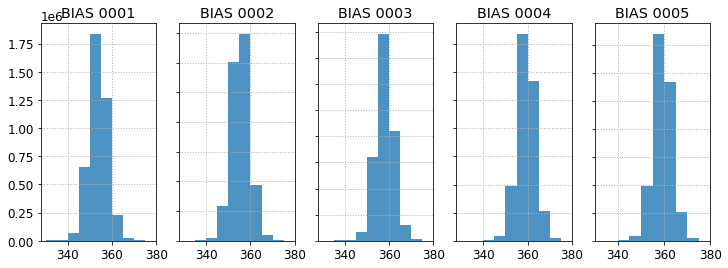

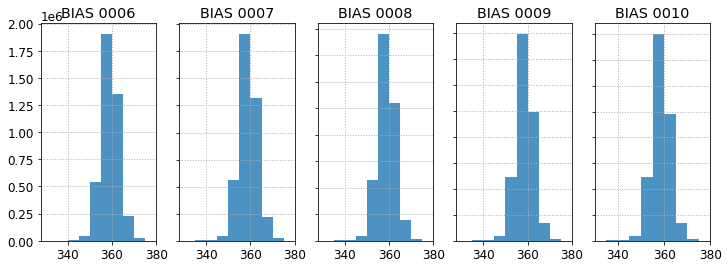

In [11]:
bins = np.arange(330, 380, 5)
fig, axarr = plt.subplots(ncols=5, nrows=1, figsize=(12, 4))
for i in range(0,5): #len(my_bias_files)):
    ax = axarr[i]
    ax.hist(image_bias[i].data.flatten(), alpha=0.8, bins=bins, label=i)
    ax.grid()
    ax.set_xticks([340,360,380])
    ax.set_title('BIAS '+image_bias[i].header['FILENAME'][8:12])
    if i > 0:
        ax.label_outer()
plt.xlim(330,380)

fig, axarr = plt.subplots(ncols=5, nrows=1, figsize=(12, 4))
for i in range(5,10): #len(my_bias_files)):
    ax = axarr[i-5]
    ax.hist(image_bias[i].data.flatten(), alpha=0.8, bins=bins, label=i)
    ax.grid()
    ax.set_xticks([340,360,380])
    ax.set_title('BIAS '+image_bias[i].header['FILENAME'][8:12])
    if i > 0:
        ax.label_outer()
plt.xlim(330,380);

#### Display of files

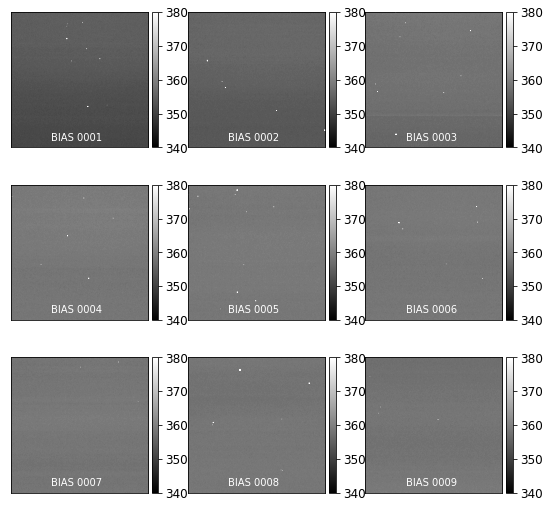

In [12]:
vmin, vmax = 340, 380
i = 0
fig, axarr = plt.subplots(ncols=3, nrows=3, figsize=(9, 9))
for row in range(3):
    for col in range(3):
        ax = axarr[row][col]
        img = ax.imshow(image_bias[i], vmin=vmin, vmax=vmax)
        #ax.set_xlabel('X axis')
        #ax.set_ylabel('Y axis')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.text(600, 100, 'BIAS '+image_bias[i].header['FILENAME'][8:12], fontsize=10, color='w')
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(img, cax=cax) #, label='Number of counts')
        ax.grid()
        i = i + 1

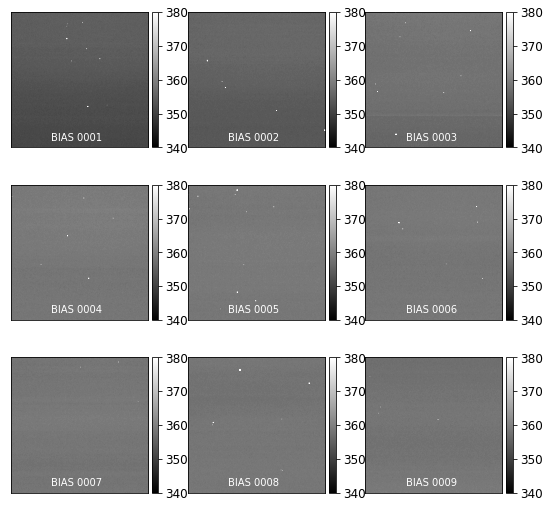

In [13]:
vmin, vmax = 340, 380
i = 0
fig, axarr = plt.subplots(ncols=3, nrows=3, figsize=(9, 9))
for ax in axarr.flat:
    img = ax.imshow(image_bias[i], vmin=vmin, vmax=vmax)
    #ax.set_xlabel('X axis')
    #ax.set_ylabel('Y axis')
    ax.set_xticks([])
    ax.set_yticks([])
    label = 'BIAS {}'.format(image_bias[i].header['FILENAME'][8:12])
    ax.text(600, 100, label, fontsize=10, color='w')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(img, cax=cax) #, label='Number of counts')
    ax.grid()
    i = i + 1

It is interesting to see some cosmic ray hits that have higher value. 

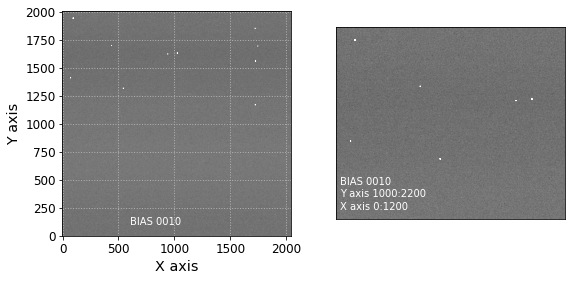

In [14]:
fig, axarr = plt.subplots(ncols=2, nrows=1, figsize=(9, 9))
ax = axarr[0]
i = 9
label = 'BIAS {}'.format(image_bias[i].header['FILENAME'][8:12])
img = ax.imshow(image_bias[9], vmin=vmin, vmax=vmax)
ax.text(600, 100, label, fontsize=10, color='w')        
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.grid()
ax = axarr[1]
img = ax.imshow(image_bias[9][1000:2200,0:1200], vmin=vmin,vmax=vmax)
ax.text(20, 180, label, fontsize=10, color='w')        
ax.text(20, 120, 'Y axis 1000:2200', fontsize=10, color='w')        
ax.text(20, 50,  'X axis 0:1200', fontsize=10, color='w')        
ax.set_xticks([])
ax.set_yticks([]);

### Combining the BIAS images

The DARK correction should be made using a combined DARK image (master DARK) using multiple observations. The combination will get rid of the high values produced by the cosmic rays. We will use the ccdproc package.

In [15]:
# Some astropy packages 
import ccdproc
from ccdproc import CCDData, Combiner
from astropy import stats
from astropy.stats import sigma_clip, mad_std
from astropy.stats import sigma_clipped_stats

In [16]:
# Combiner is a class for combining CCDData objects.
# https://ccdproc.readthedocs.io/en/latest/api/ccdproc.Combiner.html
# The Combiner class is used to combine together CCDData objects 
# including the method for combining the data, rejecting outlying data, 
# and weighting used for combining frames.

combiner = Combiner(image_bias)

In [17]:
# clipping all values over 800 to remove cosmic rays hits 
combiner.minmax_clipping(min_clip=None, max_clip=800)
# median combine 
master_dark = combiner.median_combine()
# median filter  
master_dark_filtered = ccdproc.median_filter(master_dark, 3)

Let display a region of one of the BIAS images and the master DARK

In [18]:
# auxiliary function to display a rectangle and compute mean value within it
def draw_rectangle(ax, image_data, x1, x2, y1, y2, color, text=False):
    ax.plot((x1, x1), (y1, y2), color, lw=1)
    ax.plot((x2, x2), (y1, y2), color, lw=1)
    ax.plot((x1, x2), (y1, y1), color, lw=1)
    ax.plot((x1, x2), (y2, y2), color, lw=1)
    if text:
        media = image_data[y1:y2,x1:x2].mean()
        std   = image_data[y1:y2,x1:x2].std()
        ax.text((x1+x2)/2, y1+(y2-y1)/8, str(int(media)), 
                ha='center', va='center', color=color, fontsize=15)        
        ax.text((x1+x2)/2, y2-(y2-y1)/8, str(round(std,1)), 
                ha='center', va='top', color=color, fontsize=15)
    return media, std

<ipython-input-19-a798d2041fa2>:14: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.imshow(box, vmin=vmin, vmax=vmax,norm=LogNorm())


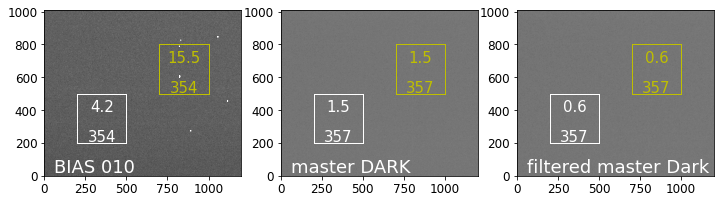

In [19]:
from matplotlib.colors import LogNorm
fig, axarr = plt.subplots(ncols=3, nrows=1, figsize=(12, 6))
for i in range(3):
    ax = axarr[i]
    if i==0:
        box = image_bias[0].data[1000:2200,0:1200]
        label = 'BIAS 010'
    if i==1:  
        box = master_dark.data[1000:2200,0:1200]  # We need to convert CCDdata to np.array
        label = 'master DARK'
    if i == 2:
        box = master_dark_filtered.data[1000:2200,0:1200]
        label = 'filtered master Dark'
    ax.imshow(box, vmin=vmin, vmax=vmax,norm=LogNorm())
    ax.text(0.05, 0.05,label, ha='left', va='center', color='w',
            transform=ax.transAxes, fontsize=18)
    draw_rectangle(ax, box , 200, 500, 200, 500, color='w',text=True)
    draw_rectangle(ax, box , 700, 1000, 500, 800, color='y',text=True)
    #draw_rectangle(ax, box , 120, 190, 120, 190, color='k',text=True)

The cosmic ray hits in the yellow rectangle for the single DARK exposure has disappeared in the master DARK. The standard deviations of the master DARK is also lower that those of the single exposure. The third panel shows a filtered master DARK.

#### Writting the Master DARK

In [20]:
# Copy primary header from single dark file and copy into master_dark header
master_dark.header = image_bias[0].header.copy()

In [21]:
# Replace FILENAME keyword and add information
master_dark.header['HISTORY']  = f'super DARK combining {len(image_bias)} BIAS images'
nowtime = datetime.datetime.now().isoformat('T', timespec='seconds')
master_dark.header['HISTORY']  = f'{nowtime} astropy median combine'
master_dark.header['HISTORY']  = f'BIAS images from {image_bias[0].header["FILENAME"]} to {image_bias[9].header["FILENAME"]}'
master_dark.header['FILENAME'] = 'N1_master_dark' 

In [22]:
master_dark.write(directory / 'zero_N1.fits', overwrite='yes')